### Modern Face Recognition 
#### Step 1. Find faces

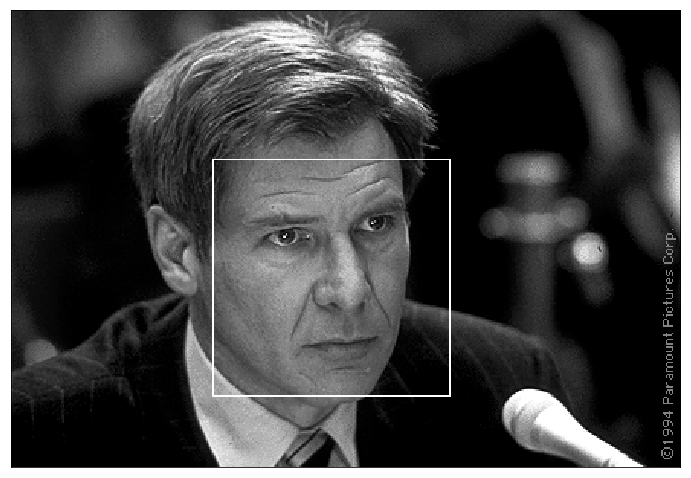

In [3]:
import cv2
import dlib
from matplotlib import pyplot as plt
from skimage import io

file_name = "/home/deeplearning/Desktop/projects/tesis/pedestrian-faces-detection/datasets/images/newtest/cpd.gif"

face_detector = dlib.get_frontal_face_detector()
image = io.imread(file_name)
detected_faces = face_detector(image, 1)
for i, face_rect in enumerate(detected_faces):
    cv2.rectangle(image, 
                  (face_rect.left(), face_rect.top()), (face_rect.right(), face_rect.bottom()), 
                  (255, 255, 255), 1)

plt.figure(figsize=(12,12))
plt.imshow(image, interpolation='none', cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

#### Step 2. Posing and Projecting Faces
##### 2.a. Finding faces land marks

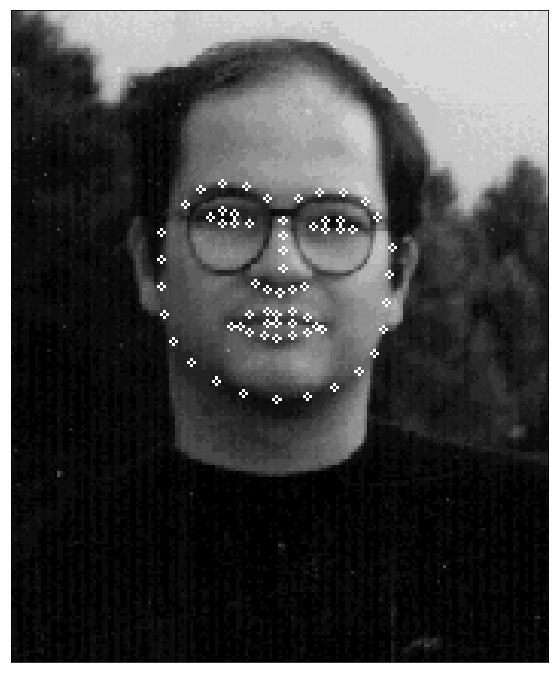

In [3]:
import cv2
import dlib
import numpy as np
from matplotlib import pyplot as plt
from skimage import io

predictor_model = "/home/deeplearning/Desktop/projects/tesis/data/dlib/shape_predictor_68_face_landmarks.dat"
file_name = "/home/deeplearning/Desktop/projects/tesis/pedestrian-faces-detection/datasets/images/newtest/cfb.gif"

face_detector = dlib.get_frontal_face_detector()
face_pose_predictor = dlib.shape_predictor(predictor_model)
image = io.imread(file_name)

detected_faces = face_detector(image, 1)
for i, face_rect in enumerate(detected_faces):
    # cv2.rectangle(image, 
    #               (face_rect.left(), face_rect.top()), (face_rect.right(), face_rect.bottom()), 
    #               (255, 255, 255), 1)
    pose_landmarks = face_pose_predictor(image, face_rect)
    pose_landmarks_iterable = np.matrix([[p.x, p.y] for p in pose_landmarks.parts()])
    for l, point in enumerate(pose_landmarks_iterable):
        pos = (point[0, 0], point[0, 1])
        cv2.circle(image, pos, 1, color=(255, 255, 255))

plt.figure(figsize=(12, 12))
plt.imshow(image, interpolation='none', cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

##### 2.b. Projecting images

In [2]:
import cv2
import dlib
import numpy as np
import openface
from matplotlib import pyplot as plt
from skimage import io

predictor_model = "/home/deeplearning/Desktop/data/shape_predictor_68_face_landmarks.dat"
file_name = "/home/deeplearning/Desktop/data/cfb.gif"

face_detector = dlib.get_frontal_face_detector()
face_pose_predictor = dlib.shape_predictor(predictor_model)
image = io.imread(file_name)

detected_faces = face_detector(image, 1)
for i, face_rect in enumerate(detected_faces):
    cv2.rectangle(image, 
                  (face_rect.left(), face_rect.top()), (face_rect.right(), face_rect.bottom()), 
                  (255, 255, 255), 1)
    pose_landmarks = face_pose_predictor(image, face_rect)
    pose_landmarks_iterable = np.matrix([[p.x, p.y] for p in pose_landmarks.parts()])
    for l, point in enumerate(pose_landmarks_iterable):
        pos = (point[0, 0], point[0, 1])
        cv2.circle(image, pos, 1, color=(255, 255, 255))

plt.figure(figsize=(12, 12))
plt.imshow(image, interpolation='none', cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

ImportError: No module named 'openface'

#### 3. Encoding faces

In [9]:
import face_recognition

audrey = "/home/deeplearning/Desktop/projects/tesis/pedestrian-faces-detection/datasets/images/newtest/audrey2.gif"
audrey_image = face_recognition.load_image_file(audrey)
audrey_face_encoding = face_recognition.face_encodings(audrey_image)[0]

print("face encoding: ", audrey_face_encoding.shape[0])
print(audrey_face_encoding)

face encoding:  128
[-0.07855741  0.0639889   0.01905344 -0.12347364 -0.08834559 -0.01469532
 -0.07381523 -0.16301377  0.20637359 -0.14152914  0.1325606  -0.07759517
 -0.25198665 -0.02271341 -0.09657005  0.1610572  -0.19546261 -0.17731699
  0.03729215 -0.04673372  0.03257279  0.14747393 -0.01402348  0.02957574
 -0.07348779 -0.28539768 -0.06260021 -0.04387376  0.00903543 -0.08032823
  0.00348485  0.08923919 -0.19571035  0.0318332   0.04059747  0.12827344
 -0.04363866 -0.13283007  0.20164236  0.06307296 -0.19566481 -0.04914713
  0.04396749  0.20803018  0.1992837  -0.06957475 -0.10100684 -0.17505701
  0.13890509 -0.18865298 -0.07175297  0.20949173  0.03087778  0.0759123
 -0.02646707 -0.18011925  0.00914596  0.13027999 -0.24754961 -0.03562782
 -0.00623202 -0.14286771  0.01543299 -0.09170974  0.14880036  0.05432224
 -0.07282453 -0.22394638  0.1510507  -0.18552683 -0.10310097  0.08420129
 -0.12649085 -0.19461244 -0.27862832 -0.03490306  0.2177209   0.15472195
 -0.09331322  0.10713496 -0.0176

ENROLLMENT


 done

IDENTIFICATION


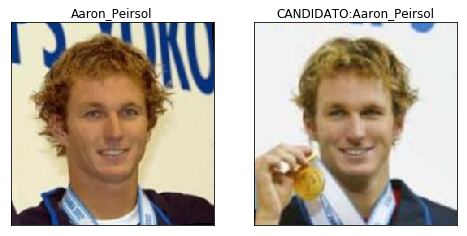

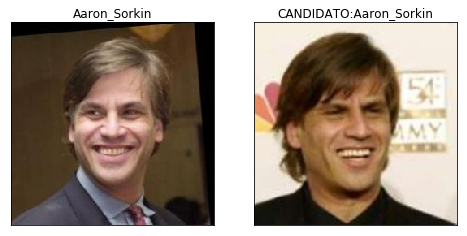

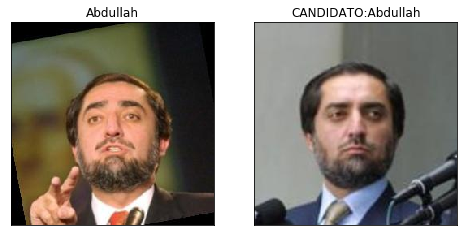

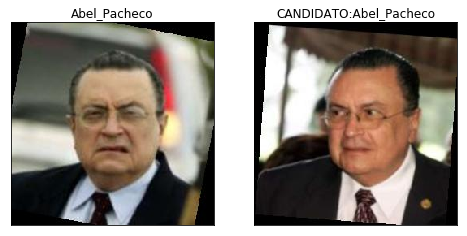

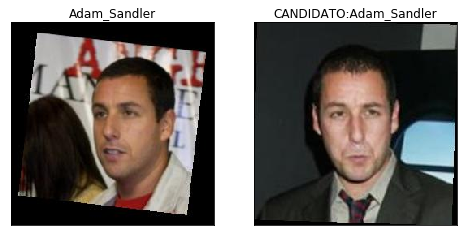

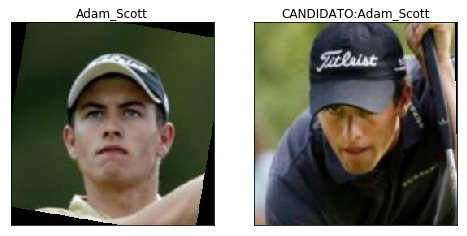

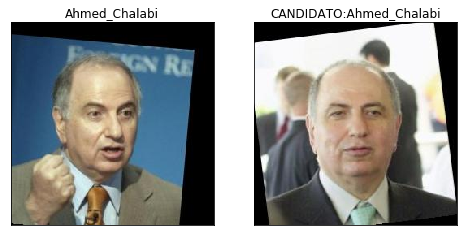

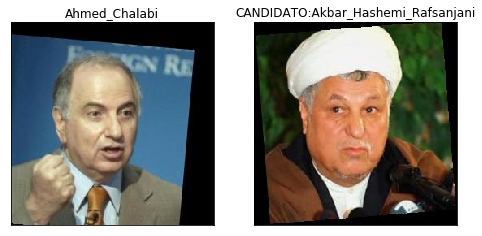

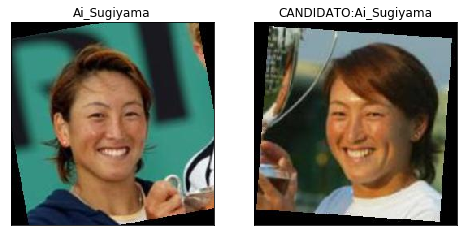

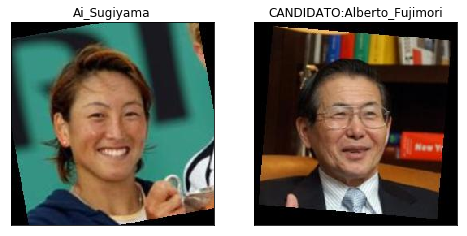

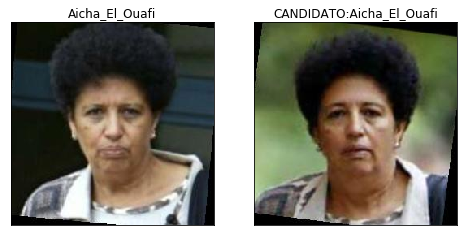

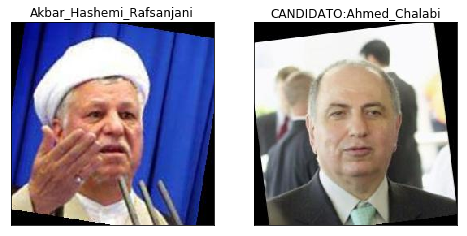

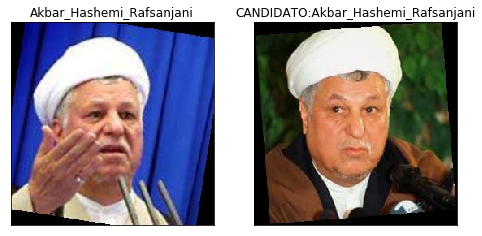

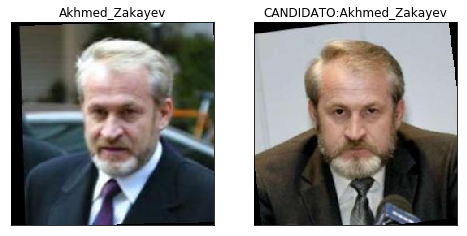

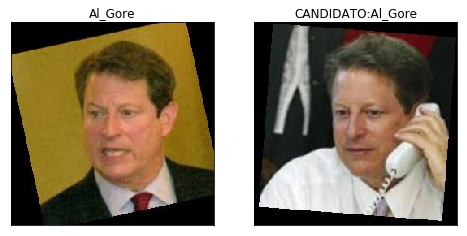

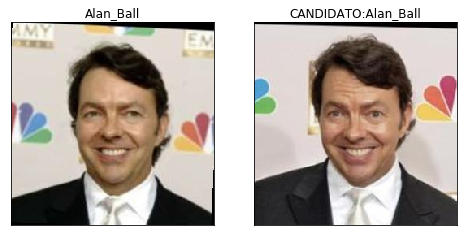

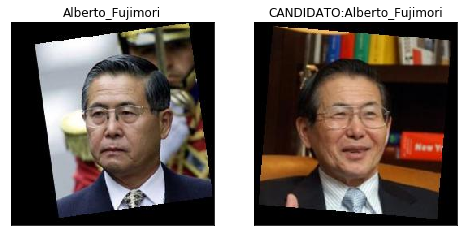

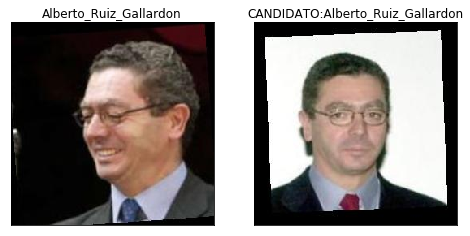

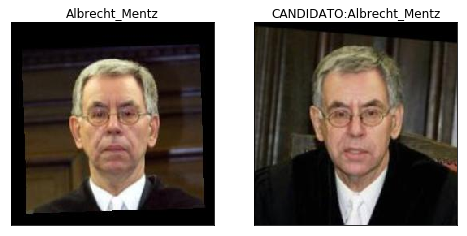

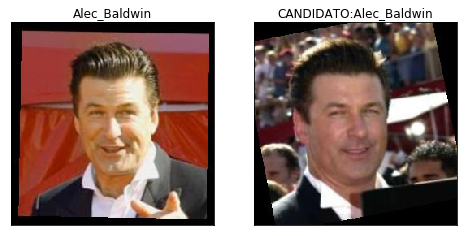

In [12]:
import face_recognition
from matplotlib import pyplot as plt

# using LFW dataset - pairs test
base = "/home/deeplearning/Desktop/projects/tesis/datasets/lfw/lfw-deepfunneled/" 
people = ["Aaron_Peirsol", "Aaron_Sorkin", "Abdel_Nasser_Assidi", "Abdullah", "Abel_Pacheco", "Adam_Sandler", "Adam_Scott", "Adolfo_Aguilar_Zinser", "Ahmed_Chalabi", "Ai_Sugiyama", "Aicha_El_Ouafi", "Akbar_Hashemi_Rafsanjani", "Akhmed_Zakayev", "Al_Gore", "Alan_Ball", "Alberto_Fujimori", "Alberto_Ruiz_Gallardon", "Albrecht_Mentz", "Alec_Baldwin"]

print("ENROLLMENT")
encodings_db = []
names_db = []
for person in people:
    path = base + person + "/" + person + "_0001.jpg"
    # print(path)
    image = face_recognition.load_image_file(path)
    encodings = face_recognition.face_encodings(image)
    if len(encodings) == 1:        
        encodings_db.append(encodings[0])
        names_db.append(person)
    # else:
        # print(" warning: ", len(encodings), " faces detected")
print(" done")

# falta centrar porque se halla una distancia euclidiana
# los puntos pueden convertirse en vectores?? tipo huellas
# todo hacer alineamiento
print()


print("IDENTIFICATION")
# for person in people:  # no in people
for person in names_db:
    path = base + person + "/" + person + "_0002.jpg"
    # print(path)
    image = face_recognition.load_image_file(path)
    encodings = face_recognition.face_encodings(image)
    if len(encodings) == 1:        
        results = face_recognition.compare_faces(encodings_db, encodings[0], 0.6)
        for i, result in enumerate(results):
            if result:
                # print(" candidate: ", names_db[i])
                fig = plt.figure(figsize=(8,8))
                a = fig.add_subplot(1, 2, 1)
                a.set_title(person)
                plt.xticks([]), plt.yticks([])
                image_person = image
                plt.imshow(image_person, cmap='gray', interpolation='none')
            
                a = fig.add_subplot(1, 2, 2)
                candidate = names_db[i]
                a.set_title("CANDIDATO:" + candidate)
                plt.xticks([]), plt.yticks([])
                image_candidate = face_recognition.load_image_file(base + candidate + "/" + candidate + "_0001.jpg")
                plt.imshow(image_candidate, cmap='gray', interpolation='none')
                plt.show()
    # else:
        # print(" warning: ", len(encodings), " faces detected")